In [2]:
from moku.instruments import MultiInstrument, DigitalFilterBox, FrequencyResponseAnalyzer
import control as ct
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Configure the MOKU to set and measure a PID controller with these parameters
MIM = MultiInstrument('192.168.50.97', force_connect=True, platform_id=4) #192.168.50.97 is the IP for Moku Pro 1

dfb = MIM.set_instrument(1, DigitalFilterBox)
fra = MIM.set_instrument(2, FrequencyResponseAnalyzer)

connections = [dict(source="Slot1OutA", destination="Slot2InA"),
               dict(source="Slot2OutA", destination="Slot1InA")]

MIM.set_connections(connections=connections)

[{'destination': 'Slot1InA', 'source': 'Slot2OutA'},
 {'destination': 'Slot2InA', 'source': 'Slot1OutA'},
 {'destination': 'Slot2InB', 'source': 'Slot1OutB'}]

In [6]:
# Configure IIR filter 1 of the DFB

# The following example array produces an 8th order Direct-form 1
# Chebyshev type 2 IIR filter with a normalized stopband frequency
# of 0.2 pi rad/sample and a stopband attenuation of 40 dB.
filter_coefficients = [
    [1.0000000000, 0.6413900006, -1.0290561741, 0.6413900006, -1.6378425857, 0.8915664128],
    [1.0000000000, 0.5106751138, -0.7507394931, 0.5106751138, -1.4000444473, 0.6706551819],
    [1.0000000000, 0.3173108134, -0.3111365531, 0.3173108134, -1.0873085012, 0.4107935750]]

dfb.set_custom_filter(1, "39.06MHz", scaling=10,
                    coefficients=filter_coefficients)

dfb.enable_output(1,True,True)

{'output': True, 'signal': True}

In [7]:
fra.set_sweep(start_frequency=10, stop_frequency=20e6, num_points=256,
                averaging_time=1e-3, averaging_cycles=1, settling_cycles=1,
                settling_time=1e-3)
fra.set_output(1, 0.01)

{'amplitude': 0.01, 'offset': 0.0}

In [8]:
delay = fra.start_sweep() 
print(delay)
data = fra.get_data(wait_complete = True)

{'estimated_sweep_time': 3.9502599500690194}


In [9]:
MIM.relinquish_ownership()

In [10]:
df = pd.DataFrame(data = data['ch1'])
#df = df.drop(columns = 'phase')

df

,frequency,magnitude,phase
0,9.999992e+00,19.981864,-0.003743
1,1.058546e+01,19.981864,-0.003963
2,1.120520e+01,19.981864,-0.004194
3,1.186122e+01,19.981864,-0.004440
4,1.255565e+01,19.981864,-0.004700
...,...,...,...
251,1.592907e+07,1.242692,175.649024
252,1.686166e+07,0.537210,171.128094
253,1.784885e+07,-1.362920,133.015232
254,1.889383e+07,-5.857387,57.471884


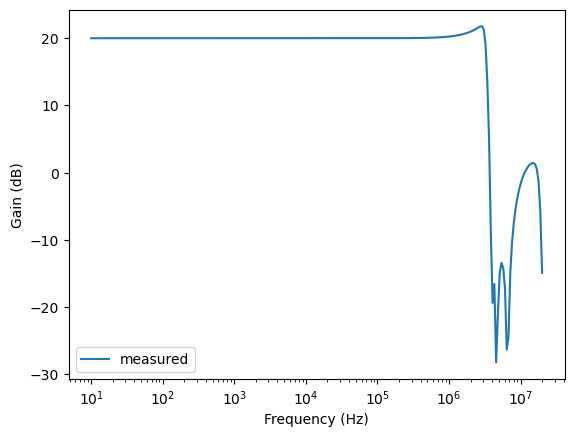

In [11]:
plt.semilogx(df['frequency'],df['magnitude'])
plt.legend(['measured'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.show()